In [1]:
"""Scrape the sample Schedule page to output 
the number of courses being taught and
the total number of credits, in the following format:
Dr. Dancik is teaching 3 courses (9 credits)"""

'Scrape the sample Schedule page (https://gdancik.github.io/CSC301/data/notes/schedule.html) to output the number of courses being taught and\nthe total number of credits, in the following format:\nDr. Dancik is teaching 3 courses (9 credits)'

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

headers = {"User-Agent": "ProjectBot/1.0 jimenezsagasteguib@easternct.edu"}

page = requests.get('https://gdancik.github.io/CSC-301/data/notes/schedule.html')



if page.status_code != requests.codes.ok :
    print("Request was not successful, status code:", page.status_code)
    print("Hit enter to continue...")
    input()
    exit()
    
    

In [3]:

soup = BeautifulSoup(page.content, 'html.parser')

instructor = soup.title.string.strip()[23:]
tr = soup.find_all('tr')

numofClasses = len(tr[1:])
new=[]

classCredit = 0
for r in tr[1:]:
    second = soup.findAll('td')[2].contents
    for s in second:
        classCredit = classCredit + int(s)
        
classCredit
print(instructor, "is teaching", numofClasses, "courses (", classCredit, ")")

Dr. Dancik is teaching 4 courses ( 12 )


In [4]:
""" Scrapes the title and rating for 5 movies from IMDB, and
constructs a bar graph that shows the rating for each movie. """

'2. Scrape the title and rating for 5 movies from IMDB, whose links are given below, and\nconstruct a bar graph that shows the rating for each movie. Give your graph an\ninformative title. '

In [7]:

website = ['https://www.imdb.com/title/tt0109830/?ref_=fn_al_tt_1',
           'https://www.imdb.com/title/tt0076759/?ref_=fn_tt_tt_1',
           'https://www.imdb.com/title/tt0368226/?ref_=nv_sr_2',
           'https://www.imdb.com/title/tt10545076/?ref_=nv_sr_srsg_0',
           'https://www.imdb.com/title/tt3890160/?ref_=nv_sr_srsg_0'
           ]
movieName = []
rate = []
for a in website:
    page = requests.get(a)

    if page.status_code != requests.codes.ok :
        print("Request was not successful, status code:", page.status_code)
        print("Hit enter to continue...")
        input()
        exit()    
    firstMovie = BeautifulSoup(page.content, 'html.parser')
    movieName.append(firstMovie.title.string.strip()[0:-7])
    rate.append(float(firstMovie.find('span',{'itemprop':'ratingValue'}).text))
    time.sleep(1)



Text(0, 0.5, 'Rating (Out of 10)')

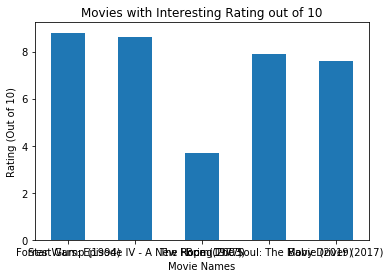

In [8]:
#wait for process to finish. Then plot bargraph

In [14]:
#create dataframe
df= pd.DataFrame(data = {"Movie_Name":movieName, "Rating":rate})
df

,Movie_Name,Rating
0,Forrest Gump (1994),8.8
1,Star Wars: Episode IV - A New Hope (1977),8.6
2,The Room (2003),3.7
3,Bring The Soul: The Movie (2019),7.9
4,Baby Driver (2017),7.6


Text(0, 0.5, 'Rating (Out of 10)')

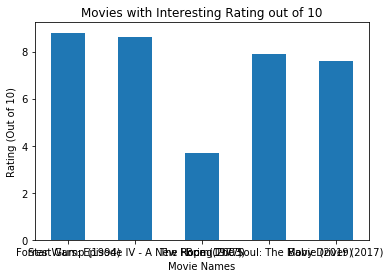

In [15]:
plt = df.plot.bar(x = "Movie_Name", y = "Rating", 
            title = "Movies with Interesting Rating out of 10",
            legend = False, rot = 0.0)

plt.set_xlabel("Movie Names")
plt.set_ylabel("Rating (Out of 10)")

In [33]:
"""3. Indeed search """
pd.options.display.html.use_mathjax = False
page = requests.get('https://www.indeed.com/jobs?q=video+game&l=Levittown%2C+PA')

soup = BeautifulSoup(page.content, 'html.parser')
pd.options.display.html.use_mathjax = False

In [28]:
#job name
jobs = []
def job_title(soup): 
  for div in soup.find_all(name="div", attrs={"class":"row"}):
      for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
          jobs.append(a["title"])
  return(jobs)
job_title(soup)


['Retail Staff',
 'PlayStation Representative - South New Jersey',
 'Computer Science and Coding/Game Design Teacher',
 'Writer',
 'Instructors - STEM/ Technology Summer Camp',
 'Team Member - Virtual Reality Gaming',
 'STEM/ Technology Summer Camp Staff',
 'Game Design Adjunct Instructor',
 'Instructors and Camp Counselors for a Summer STEM Day Camp',
 'Game Tender']

In [29]:
#company
companies = []
def find_company(soup): 
  for div in soup.find_all(name="div", attrs={"class":"row"}):
    company = div.find_all(name="span", attrs={"class":"company"})
    if len(company) > 0:
      for b in company:
          companies.append(b.text.strip())
    else:
      sec_try = div.find_all(name="span", attrs={"class":"result-link-source"})
      for span in sec_try:
          companies.append(span.text.strip())
  return(companies)
 
find_company(soup)

['GameStop',
 'Sony Interactive Entertainment PlayStation',
 'Spring Education Group',
 'Hardcore Games',
 'Black Rocket Productions',
 'Hyperspace Gaming',
 'Black Rocket Productions',
 'Mercer County Community College',
 'International Ivy Enrichment Programs',
 'Thirsty Dice']

In [30]:
#location
locations = []
def find_location(soup): 
  spans = soup.findAll('span', attrs={'class': 'location'})
  for span in spans:
    locations.append(span.text)
  return(locations)
find_location(soup)


['Fairless Hills, PA 19030',
 'Cherry Hill, NJ',
 'Philadelphia, PA',
 'Philadelphia, PA 19123 (Northern Liberties area)',
 'Langhorne, PA 19047',
 'Township of Lawrence, NJ 08648',
 'Newtown, PA 18940',
 'Windsor, NJ',
 'Burlington, NJ 08016',
 'Philadelphia, PA 19130 (Spring Garden area)']

In [34]:

#salary
salaries = []
def find_salary(soup): 
  for div in soup.find_all(name='div', attrs={'class':'row'}):
    try:
      salaries.append(div.find('nobr').text)
    except:
      try:
        div_two = div.find(name='div', attrs={'class':'sjcl'})
        div_three = div_two.find(name='span', attrs={'class': "salaryText"})
        salaries.append(div_three.text.strip())
      except:
        salaries.append('?')
  return(salaries)
find_salary(soup)



['?', '?', '?', '?', '?', '?', '?', '?', '?', '?']

In [35]:
df= pd.DataFrame(data = {"Title":jobs, "Company":companies, "Location":locations,"Salary":salaries})
df

,Title,Company,Location,Salary
0,Retail Staff,GameStop,"Fairless Hills, PA 19030",?
1,PlayStation Representative - South New Jersey,Sony Interactive Entertainment PlayStation,"Cherry Hill, NJ",?
2,Computer Science and Coding/Game Design Teacher,Spring Education Group,"Philadelphia, PA",?
3,Writer,Hardcore Games,"Philadelphia, PA 19123 (Northern Liberties area)",?
4,Instructors - STEM/ Technology Summer Camp,Black Rocket Productions,"Langhorne, PA 19047",?
5,Team Member - Virtual Reality Gaming,Hyperspace Gaming,"Township of Lawrence, NJ 08648",?
6,STEM/ Technology Summer Camp Staff,Black Rocket Productions,"Newtown, PA 18940",?
7,Game Design Adjunct Instructor,Mercer County Community College,"Windsor, NJ",?
8,Instructors and Camp Counselors for a Summer S...,International Ivy Enrichment Programs,"Burlington, NJ 08016",?
9,Game Tender,Thirsty Dice,"Philadelphia, PA 19130 (Spring Garden area)",?
